<a href="https://colab.research.google.com/github/Megalogic-Point-of-Sales-02/PoS-ML/blob/sales-forecast/Sales_Forecast_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv', encoding='cp1252')
pd.set_option('display.max_columns', None)
train.head()

<ipython-input-3-c2600843c27c>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv', encoding='cp1252')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/test.csv', encoding='cp1252')
pd.set_option('display.max_columns', None)
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [ ]:
print("Jumlah duplikasi data : " + str(train.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
print("Jumlah duplikasi data : " + str(test.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
train_sales_date = train[['Date', 'Sales']]
train_sales_date['Date'] = pd.to_datetime(train_sales_date['Date'])
train_sales_date

<ipython-input-9-6afb4aed1508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sales_date['Date'] = pd.to_datetime(train_sales_date['Date'])


,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [ ]:
test_sales_date = test[['Date']]
test_sales_date['Date'] = pd.to_datetime(test_sales_date['Date'])
test_sales_date

<ipython-input-10-f5db4516f908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sales_date['Date'] = pd.to_datetime(test_sales_date['Date'])


,Date
0,2015-09-17
1,2015-09-17
2,2015-09-17
3,2015-09-17
4,2015-09-17
...,...
41083,2015-08-01
41084,2015-08-01
41085,2015-08-01
41086,2015-08-01


<Axes: xlabel='Date'>

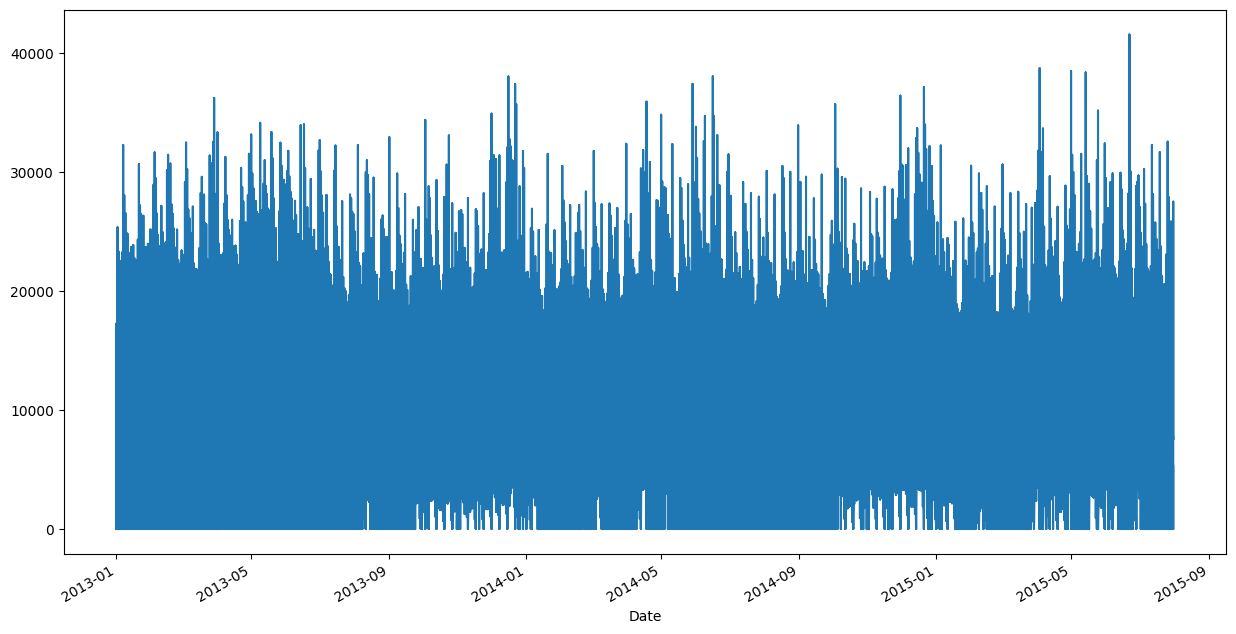

In [ ]:
plt.figure(figsize=(15,8))
train_sales_date.set_index('Date')['Sales'].plot()

## Split Dataset

In [ ]:
train_sales_date.sort_index(inplace=True)
train_sales_date = train_sales_date.sort_values(by='Date')
train_sales_date

,Date,Sales
1017208,2013-01-01,0
1016473,2013-01-01,0
1016472,2013-01-01,0
1016471,2013-01-01,0
1016470,2013-01-01,0
...,...,...
745,2015-07-31,9082
746,2015-07-31,10708
747,2015-07-31,7481
741,2015-07-31,10460


In [ ]:
sales_not_zero = train_sales_date['Sales'] != 0
filtered_train_sales_date = train_sales_date[sales_not_zero]
filtered_train_sales_date

,Date,Sales
1016447,2013-01-01,3139
1016429,2013-01-01,2401
1016606,2013-01-01,2646
1016588,2013-01-01,3113
1016624,2013-01-01,2907
...,...,...
745,2015-07-31,9082
746,2015-07-31,10708
747,2015-07-31,7481
741,2015-07-31,10460


In [ ]:
normalize = MinMaxScaler()
filtered_train_sales_date['Sales'] = normalize.fit_transform(filtered_train_sales_date[['Sales']])

<ipython-input-14-f38d78fdb843>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_sales_date['Sales'] = normalize.fit_transform(filtered_train_sales_date[['Sales']])


In [ ]:
sales = filtered_train_sales_date.drop(['Date'], axis = 1)
sales = np.array(sales)

In [ ]:
split_size = int(np.ceil(len(sales) * 0.6))

In [ ]:
train_data = sales[0:int(split_size), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(365, len(train_data)):
    x_train.append(train_data[i-365:i, 0])
    y_train.append(train_data[i, 0])

## Data Preprocessing

In [ ]:
# Reshape Dataset

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Model Building

In [ ]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_dim=x_train.shape[1], activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), metrics=["mae"])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=5, verbose=1, shuffle=False)

Epoch 1/10
101248/101248 [==============================] - 163s 2ms/step - loss: 0.0064 - mae: 0.0579
Epoch 2/10
101248/101248 [==============================] - 164s 2ms/step - loss: 0.0055 - mae: 0.0543
Epoch 3/10
101248/101248 [==============================] - 166s 2ms/step - loss: 0.0054 - mae: 0.0538
Epoch 4/10
101248/101248 [==============================] - 162s 2ms/step - loss: 0.0053 - mae: 0.0533
Epoch 5/10
101248/101248 [==============================] - 165s 2ms/step - loss: 0.0052 - mae: 0.0525
Epoch 6/10
101248/101248 [==============================] - 166s 2ms/step - loss: 0.0050 - mae: 0.0517
Epoch 7/10
101248/101248 [==============================] - 162s 2ms/step - loss: 0.0049 - mae: 0.0509
Epoch 8/10
101248/101248 [==============================] - 162s 2ms/step - loss: 0.0048 - mae: 0.0502
Epoch 9/10
101248/101248 [==============================] - 164s 2ms/step - loss: 0.0047 - mae: 0.0497
Epoch 10/10
101248/101248 [==============================] - 161s 2ms/ste